# Projeto Clustering
### Atividade da disciplina de Machine Learning
### Aluno: Carlos Alberto Calgaro Filho

In [181]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import glob

Importando Dependencias

In [182]:
clientes = pd.read_csv(f'./data/clientes.csv')
clientes.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preparação dos dados para Kmeans

Os atributos que correspondem a identificadores únicos devem ser retirados da análise.\
Neste dataset deve-se retirar o customerId.

In [183]:
#Descrição dos dados
print("Dataset original:")
print(clientes.head())

clientes = clientes.drop(["CustomerID"], axis=1)

generos = {
    "Female": 0,
    "Male": 1
}
print("\nDataset Modificado:\n")
clientes["Gender"] = clientes["Gender"].apply(lambda x: generos[x])
print(clientes.head(10))

Dataset original:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Modificado:

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40
5       0   22                  17                      76
6       0   35                  18                       6
7       0   23                  18                      94
8  

In [184]:
clientes.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### Transformando generos em uma lista.

In [185]:
print(" Estrutura do dataset:", clientes.shape)
tamanho_amostra=clientes.shape[0]

 Estrutura do dataset: (200, 4)


# Avaliar os clusters

### Preparação para geração de gráfico Elbow
#### Observe que quanto mais clusters formados, menor a distância total entre instâncias e centróides.
#### Veja nos números que ocorre uma grande queda entre os valores.

In [186]:
Soma_distancia_quadratica = []
K = range(1, 12)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(clientes)
    Soma_distancia_quadratica.append(km.inertia_)
print('Distâncias totais:')
print(Soma_distancia_quadratica)

Distâncias totais:
[308862.06, 212889.44245524297, 143391.5923603568, 104414.67534220165, 75399.61541401483, 58348.64136331505, 51130.690081263776, 44357.32664902665, 40708.45719280719, 37441.71909701992, 34717.18881400404]


### Veja o gráfico gerado. Onde você situa o "cotovelo"?

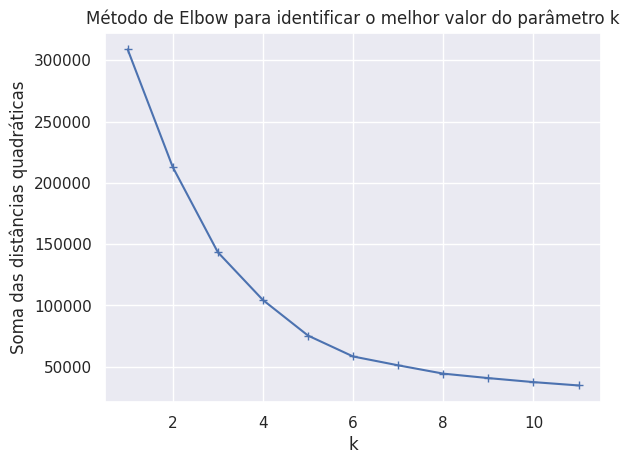

In [187]:
plt.plot(K, Soma_distancia_quadratica, 'b+-')
plt.xlabel('k')
plt.ylabel('Soma das distâncias quadráticas')
plt.title('Método de Elbow para identificar o melhor valor do parâmetro k')
plt.show()

## Preparação para geração dos valores do coeficiente Silhouette

### Os valores do coeficiente Silhouette variam entre [-1, 1]:

#### - valores próximos de +1 indicam que a amostra forma clusters distantes uns dos outros.
#### - valores próximos de 0 indicam que a amostra forma clusters próximos dos limites dos vizinhos.
#### - valores próximos de -1 indicam que a amostra contém erros de formação dos clusters.

## Observe na saída abaixo para qual valor de k obtém-se o melhor valor do coeficiente Silhoutte.

In [188]:
K = range(2,12)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(clientes)
    s_score=metrics.silhouette_score(clientes, km.labels_, metric='euclidean',sample_size=tamanho_amostra)
    print('Para n_clusters =', k, 'o valor de Silhoutte é =', s_score)

Para n_clusters = 2 o valor de Silhoutte é = 0.29307334005502633


Para n_clusters = 3 o valor de Silhoutte é = 0.383798873822341
Para n_clusters = 4 o valor de Silhoutte é = 0.4052954330641215
Para n_clusters = 5 o valor de Silhoutte é = 0.44482259384548795
Para n_clusters = 6 o valor de Silhoutte é = 0.45205475380756527
Para n_clusters = 7 o valor de Silhoutte é = 0.4394961926453089
Para n_clusters = 8 o valor de Silhoutte é = 0.4275788369618678
Para n_clusters = 9 o valor de Silhoutte é = 0.4070249961005031
Para n_clusters = 10 o valor de Silhoutte é = 0.383184564192097
Para n_clusters = 11 o valor de Silhoutte é = 0.38169235768053894


In [189]:
range_n_clusters = [2, 3, 4, 5, 6,7]
X = clientes.values[:, :5]
print(clientes.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


Para número de clusters = 2 O valor médio da silhouette é : 0.29307334005502633
Para número de clusters = 3 O valor médio da silhouette é : 0.383798873822341
Para número de clusters = 4 O valor médio da silhouette é : 0.4052954330641215
Para número de clusters = 5 O valor médio da silhouette é : 0.44424291275274114
Para número de clusters = 6 O valor médio da silhouette é : 0.45205475380756527
Para número de clusters = 7 O valor médio da silhouette é : 0.4379584974420345


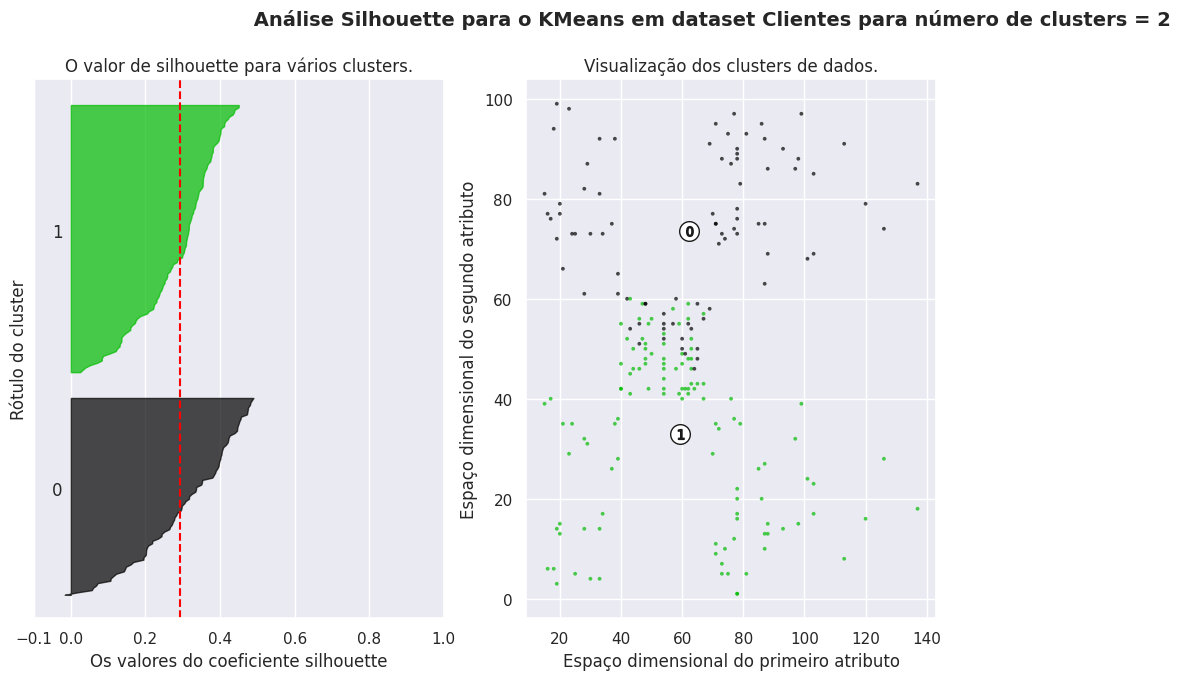

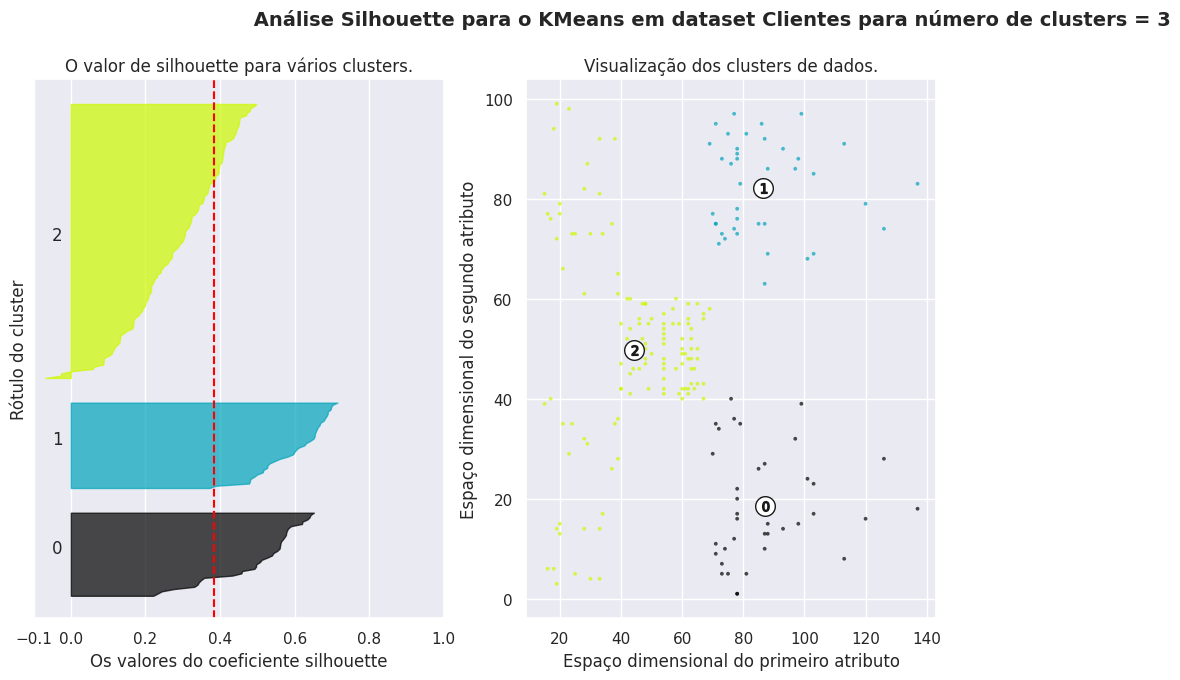

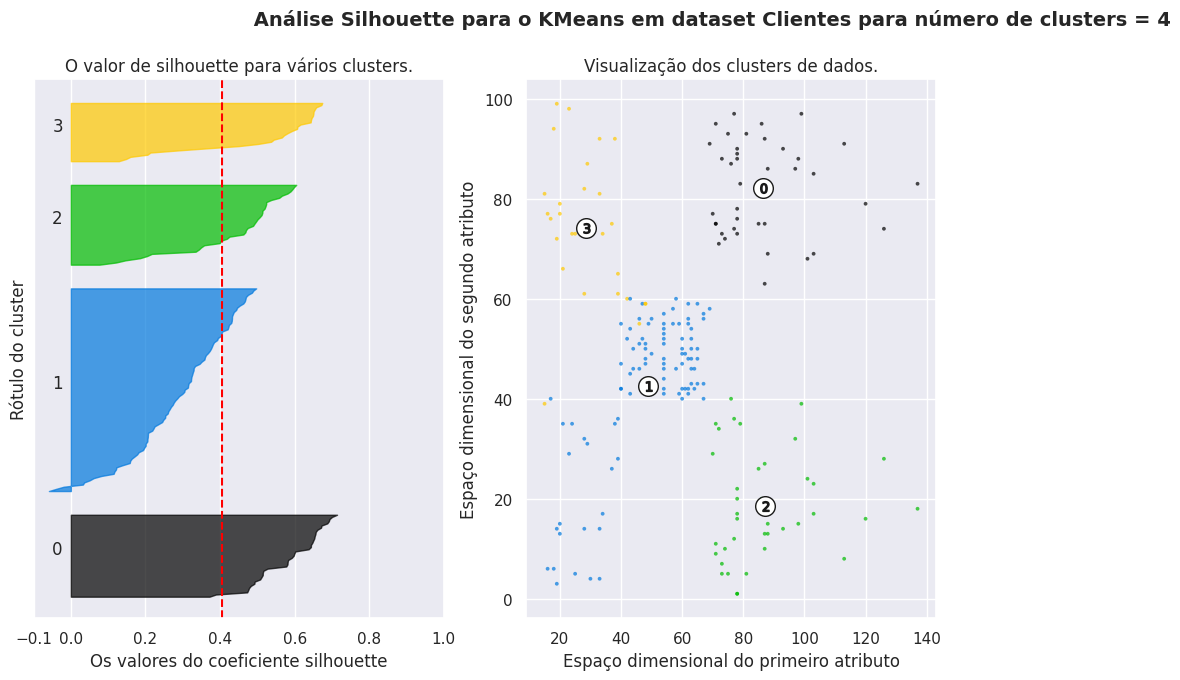

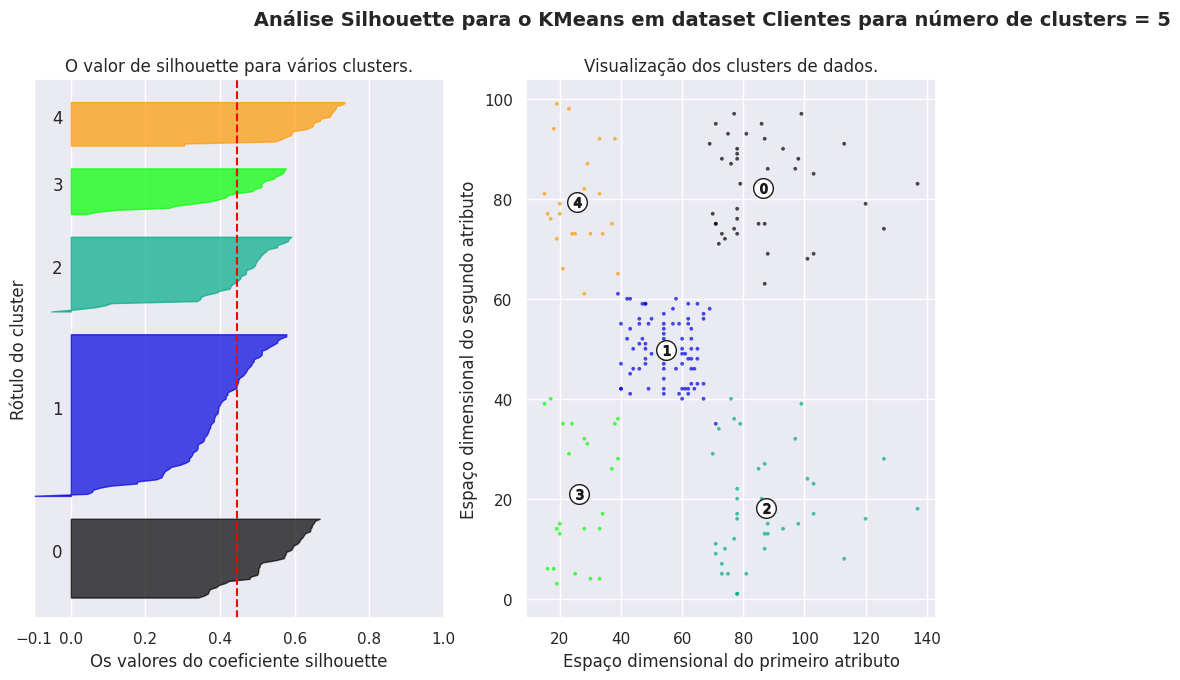

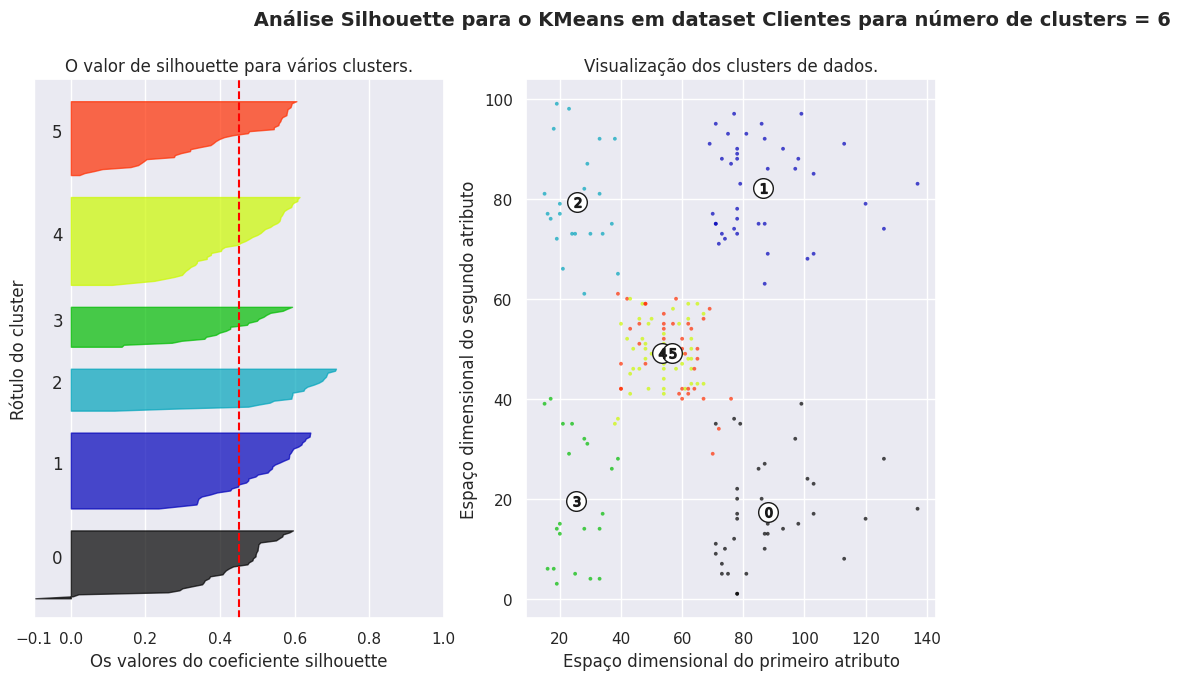

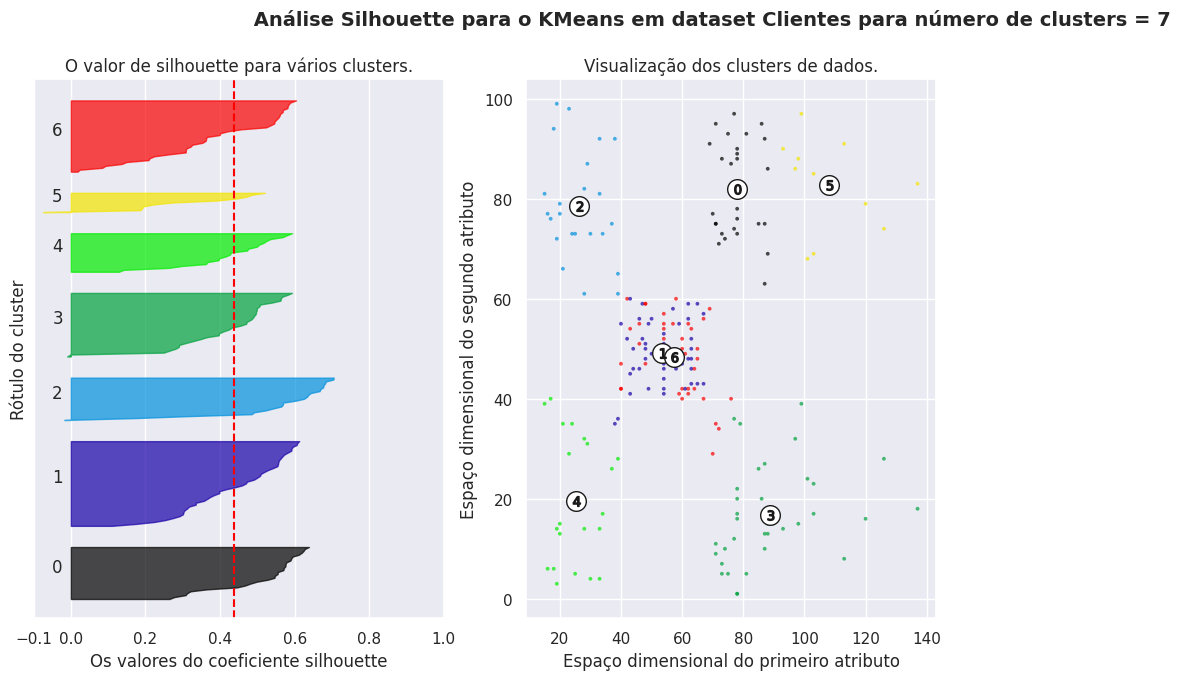

In [190]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6,7]
X = clientes.values[:, :5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure(figsize=plt.figaspect(0.5))

    # fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)

    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para número de clusters =", n_clusters,
          "O valor médio da silhouette é :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("O valor de silhouette para vários clusters.")
    ax1.set_xlabel("Os valores do coeficiente silhouette")
    ax1.set_ylabel("Rótulo do cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # Ajuste aqui os atributos que deseja visualizar
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 2], X[:, 3], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # ax3 = fig.add_subplot(1, 3, 3, projection="3d")
    # xx= np.meshgrid(X[:, 1], X[:, 2])
    # zz = X[:, 3].flatten
    # print(xx.shape)
    # print(yy.shape)
    # print(zz.shape)
    # ax3.scatter3D(xx, zz)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    # Ajuste aqui também os atributos que deseja visualizar
    ax2.scatter(centers[:, 2], centers[:, 3], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[3], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualização dos clusters de dados.")
    ax2.set_xlabel("Espaço dimensional do primeiro atributo")
    ax2.set_ylabel("Espaço dimensional do segundo atributo")

    plt.suptitle((" Análise Silhouette para o KMeans em dataset Clientes "
                  "para número de clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Melhor configuração

## Paramêtros do k-means => k=5

## Número de clusters => cinco clusters

## Grupos formados


In [191]:
from sklearn.cluster import KMeans
km_melhor_execucao = KMeans(n_clusters=5, n_init=10)
km_melhor_execucao = km_melhor_execucao.fit(clientes)
print(km_melhor_execucao.cluster_centers_)

[[ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]]


In [192]:
print(km_melhor_execucao)


KMeans(n_clusters=5, n_init=10)


## Visualize os clusteres formados
### Altere os parâmetro numero_clusteres para visualizar com diferentes cenários

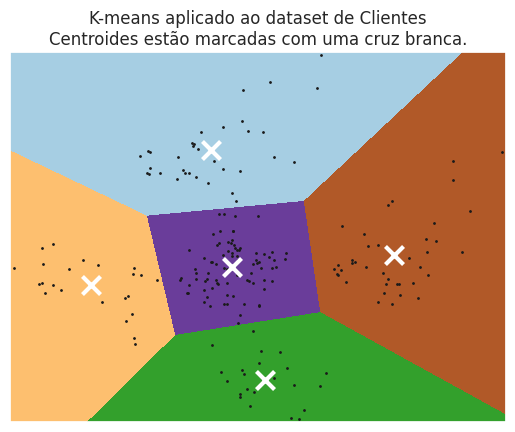

Pontos das centróides:
[[-10.22445521  42.33140596]
 [  4.98536192 -46.67336912]
 [-44.38675468 -10.05043814]
 [ -4.41026389  -3.10070422]
 [ 41.55103875   1.87087541]]
Instâncias clusterizadas:
[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 4 0 4 0 4 3 4 0 4 0 4 0 4 0 4 3 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [193]:
from mpl_toolkits import mplot3d
numero_clusteres = 5
reduced_data = PCA(n_components=2).fit_transform(clientes)
kmeans = KMeans(init='k-means++', n_clusters=numero_clusteres, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means aplicado ao dataset de Clientes\n'
          'Centroides estão marcadas com uma cruz branca.')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print("Pontos das centróides:")
print(kmeans.cluster_centers_)
print("Instâncias clusterizadas:")
print(kmeans.labels_)

In [194]:
clientes['Cluster'] = kmeans.labels_

In [195]:
clientes.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2


In [196]:
# dados_pizza_copia['Cluster'] = kmeans.labels_


In [197]:
# dados_pizza_copia

# Interpretação dos Clusters


In [198]:
from sklearn.tree import _tree, DecisionTreeClassifier


In [199]:
clientes2 = clientes.values[:,:4]

In [200]:
X = clientes.values[:, 1:4]
y = clientes.values[:,4]

In [201]:
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from pdb import set_trace
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

In [202]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules

  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    clf = tree.fit(data, clusters)

    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))

    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])
    return clf

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ('dim_reduction', PCA(n_components=2, random_state=0))
])
pca_clientes = clientes.drop(['Cluster'], axis=1)
pc = pipeline.fit_transform(pca_clientes)

/home/carlos/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'pc2')

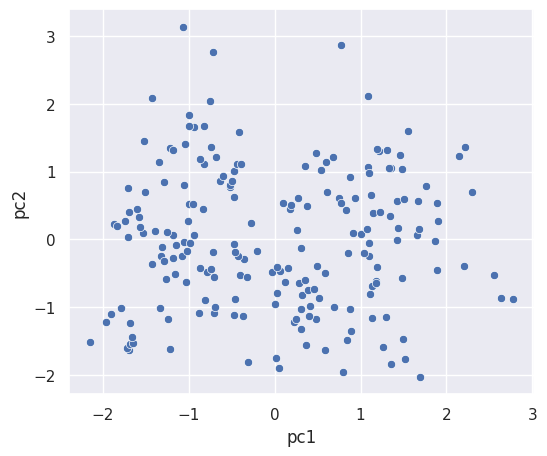

In [204]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pc[:,0], y=pc[:,1])
plt.xlabel("pc1")
plt.ylabel("pc2")

In [205]:
def kmeans_elbow_viz(data):
    sum_of_squared_distance = []
    n_cluster = range(1, 11)

    for k in n_cluster:
        kmean_model = KMeans(n_clusters=k, n_init=10)
        kmean_model.fit(data)
        sum_of_squared_distance.append(kmean_model.inertia_)

    plt.plot(n_cluster, sum_of_squared_distance, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow method for optimal K')
    plt.show()

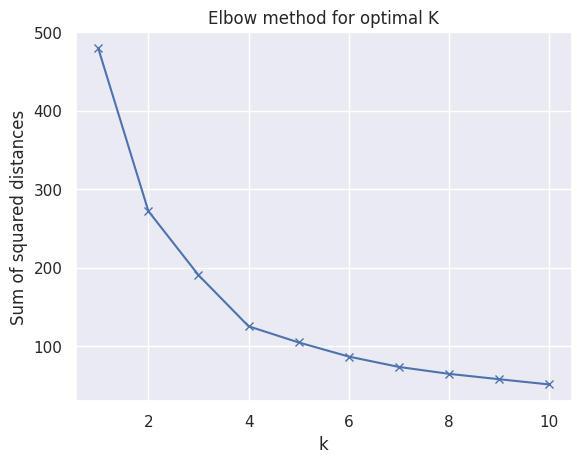

In [206]:
kmeans_elbow_viz(pc)

In [207]:
kmeans_model = KMeans(n_clusters=5, n_init=10)
y_cluster_pca = kmeans_model.fit_predict(pc)
print(clientes.head())

dados_clientes = clientes.drop(["Cluster"], axis=1)
y_cluster = kmeans_model.fit_predict(dados_clientes)

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        2
1       1   21                  15                      81        1
2       0   20                  16                       6        2
3       0   23                  16                      77        1
4       0   31                  17                      40        2


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        2
1       1   21                  15                      81        1
2       0   20                  16                       6        2
3       0   23                  16                      77        1
4       0   31                  17                      40        2


/home/carlos/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

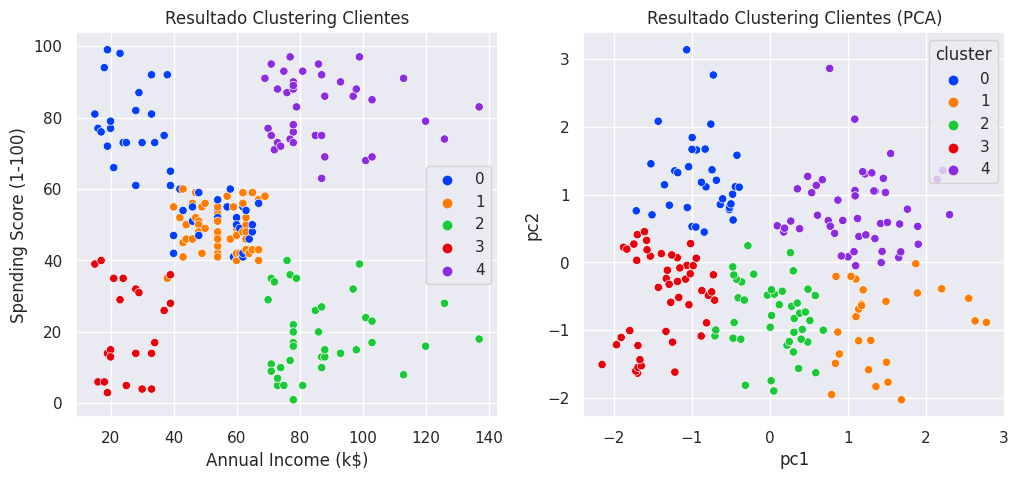

In [208]:
print(clientes.head())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=y_cluster_pca, palette='bright', ax=ax2)
sns.scatterplot(x=dados_clientes.values[:,2], y=dados_clientes.values[:,3], hue=y_cluster, palette='bright', ax=ax1)
ax2.set(xlabel="pc1", ylabel="pc2", title="Resultado Clustering Clientes (PCA)")
ax1.set(xlabel="Annual Income (k$)", ylabel="Spending Score (1-100)", title="Resultado Clustering Clientes")
ax2.legend(title='cluster')

,class_name,instance_count,rule_list
1,0,50,[0.8771929824561403] (Annual Income (k$) <= 69.5) and (Age <= 35.5)
0,1,51,[0.9782608695652174] (Annual Income (k$) <= 69.5) and (Age > 35.5) and (Spending Score (1-100) > 41.5)
3,2,38,[1.0] (Annual Income (k$) > 69.5) and (Spending Score (1-100) <= 51.5)
4,3,22,[0.7619047619047619] (Annual Income (k$) <= 69.5) and (Age > 35.5) and (Spending Score (1-100) <= 41.5)
2,4,39,[1.0] (Annual Income (k$) > 69.5) and (Spending Score (1-100) > 51.5)


[Text(0.5, 0.875, 'Annual Income (k$) <= 69.5\ngini = 0.786\nsamples = 200\nvalue = [50, 51, 38, 22, 39]\nclass = 1'),
 Text(0.25, 0.625, 'Age <= 35.5\ngini = 0.637\nsamples = 124\nvalue = [50, 51, 0, 22, 1]\nclass = 1'),
 Text(0.125, 0.375, 'gini = 0.219\nsamples = 57\nvalue = [50, 1, 0, 6, 0]\nclass = 0'),
 Text(0.375, 0.375, 'Spending Score (1-100) <= 41.5\ngini = 0.386\nsamples = 67\nvalue = [0, 50, 0, 16, 1]\nclass = 1'),
 Text(0.25, 0.125, 'gini = 0.363\nsamples = 21\nvalue = [0, 5, 0, 16, 0]\nclass = 3'),
 Text(0.5, 0.125, 'gini = 0.043\nsamples = 46\nvalue = [0, 45, 0, 0, 1]\nclass = 1'),
 Text(0.75, 0.625, 'Spending Score (1-100) <= 51.5\ngini = 0.5\nsamples = 76\nvalue = [0, 0, 38, 0, 38]\nclass = 2'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38, 0, 0]\nclass = 2'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 0, 0, 38]\nclass = 4')]

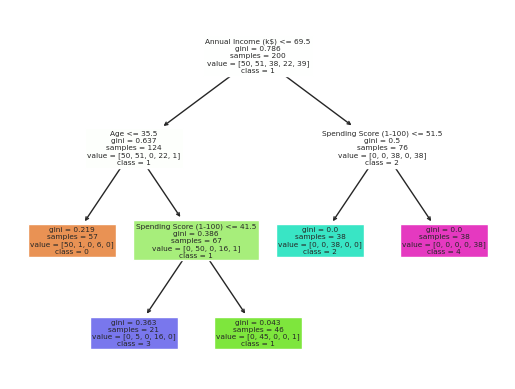

In [209]:
clf = cluster_report(dados_clientes, y_cluster, min_samples_leaf=20, pruning_level=0.05)

from sklearn import tree
tree.plot_tree(clf, 
                feature_names=list(dados_clientes.columns.values),  
                class_names=['0', '1', '2', '3', '4', '5'],
                filled=True)